# Predicción de precios de automóviles

## 01. Introduction to the data set

Exploramos los fundamentos del aprendizaje automático utilizando el algoritmo de k-vecinos más cercanos. En este proyecto vamos a practicar el flujo de trabajo de aprendizaje automático que se ha aprendido hasta ahora para predecir el precio de mercado de un automóvil utilizando sus atributos. 

El conjunto de datos con el que trabajaremos contiene información sobre varios automóviles. Para cada automóvil tenemos información sobre los aspectos técnicos del vehículo, como el desplazamiento del motor, el peso del automóvil, las millas por galón, qué tan rápido acelera el automóvil y más. 

Puedes leer más sobre el conjunto de datos [aquí](https://archive.ics.uci.edu/ml/datasets/automobile). Aquí hay una vista previa del conjunto de datos:

<img src="figs/df_preview.png" width="1200" height="800"/>





----

- Lee `imports-85.data` en un dataframe llamado `cars`. Si lee el archivo usando `pandas.read_csv()` sin especificar ningún valor de parámetro adicional, notará que los nombres de las columnas no coinciden con los de la [documentación del conjunto de datos](https://archive.ics.uci.edu/ml/datasets/automobile). ¿Por qué crees que es esto y cómo puedes solucionarlo?
- Determine qué columnas son numéricas y se pueden usar como características y qué columna es la columna objetivo (target).
- Muestre las primeras filas del datframe y asegúrese de que se vea como la vista previa del conjunto de datos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score, KFold

In [2]:
colnames = [
    'symboling',
    'normalized_losses',
    'make',
    'fuel_type',
    'aspiration',
    'num_doors',
    'body_style',
    'drive_wheels',
    'engine_location',
    'wheel_base',
    'length',
    'width',
    'height',
    'curb_weight',
    'engine_type',
    'num_of_cylinders',
    'engine_size',
    'fuel_system',
    'bore',
    'stroke',
    'compression_ratio',
    'horsepower',
    'peak_rpm',
    'city_mpg',
    'highway_mpg',
    'price',
           ]

In [3]:
cars = pd.read_csv('imports-85.data', names=colnames)
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [5]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
cars.tail()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


## 02. Limpieza de datos

Por lo general, no podemos tener valores faltantes si queremos usarlos para el modelado predictivo. Según la vista previa del conjunto de datos del último paso, podemos decir que la columna `normalized-losses` contiene valores faltantes representados con `"?"`. Reemplacemos estos valores y busquemos la presencia de valores faltantes en otras columnas numéricas. También cambiemos la escala de los valores en las columnas numéricas para que todos estén en el rango de 0 a 1.

---
- Utilice el método [`DataFrame.replace()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) para reemplazar todos los `?` valores con el valor faltante `numpy.nan`.
- Debido a que `?` es un valor de cadena, las columnas que contienen este valor se convirtieron en el tipo de datos `object` de pandas (en lugar de un tipo numérico como `int` o `float`). Después de reemplazar los `?` valores, determine qué columnas deben convertirse a tipos numéricos. Puede usar los métodos [`DataFrame.astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) o [`Series.astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) para convertir tipos de columna.
- Devuelve el número de filas a las que les falta un valor para la columna `normalized-losses`. Determine cómo debe manejar esta columna. Podrías:
    - Reemplazar los valores faltantes usando los valores promedio de esa columna.
    - Descartar las filas por completo (especialmente si a otras columnas de esas filas les faltan valores).
    - Quitar la columna por completo.
- Explore los valores faltantes para las otras columnas numéricas y maneje los valores faltantes.
- De las columnas que decidiste conservar, normaliza las numéricas para que todos los valores oscilen entre 0 y 1.

In [34]:
print(f'Number of features with missing values: ')
cars.isnull().any().sum()

Number of features with missing values: 


0

In [10]:
cars.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [13]:
cars.dtypes.unique().tolist()

[dtype('int64'), dtype('O'), dtype('float64')]

In [14]:
cars.dtypes == 'O'

symboling            False
normalized_losses     True
make                  True
fuel_type             True
aspiration            True
num_doors             True
body_style            True
drive_wheels          True
engine_location       True
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type           True
num_of_cylinders      True
engine_size          False
fuel_system           True
bore                  True
stroke                True
compression_ratio    False
horsepower            True
peak_rpm              True
city_mpg             False
highway_mpg          False
price                 True
dtype: bool

In [19]:
cars.dtypes[cars.dtypes == 'O'].index.values.tolist()

['normalized_losses',
 'make',
 'fuel_type',
 'aspiration',
 'num_doors',
 'body_style',
 'drive_wheels',
 'engine_location',
 'engine_type',
 'num_of_cylinders',
 'fuel_system',
 'bore',
 'stroke',
 'horsepower',
 'peak_rpm',
 'price']

In [35]:
cars.replace('?', np.nan, inplace=True)

In [48]:
print(cars.isnull().any(), '\n')
print('Features with missing values:')
print(cars.columns[cars.isnull().any()].values.tolist())

symboling            False
normalized_losses     True
make                 False
fuel_type            False
aspiration           False
num_doors             True
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                  True
stroke                True
compression_ratio    False
horsepower            True
peak_rpm              True
city_mpg             False
highway_mpg          False
price                 True
dtype: bool 

Features with missing values:
['normalized_losses', 'num_doors', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']


In [58]:
cars.isnull().sum().sort_values(ascending=False)

normalized_losses    41
price                 4
stroke                4
bore                  4
peak_rpm              2
num_doors             2
horsepower            2
engine_type           0
highway_mpg           0
city_mpg              0
compression_ratio     0
fuel_system           0
engine_size           0
num_of_cylinders      0
symboling             0
height                0
width                 0
length                0
wheel_base            0
engine_location       0
drive_wheels          0
body_style            0
aspiration            0
fuel_type             0
make                  0
curb_weight           0
dtype: int64

In [64]:
cols_missing_values = ['normalized_losses', 'num_doors', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']
cars[cols_missing_values].isnull().sum().sort_values(ascending=False)  / len(cars) * 100

normalized_losses    20.00000
bore                  1.95122
stroke                1.95122
price                 1.95122
num_doors             0.97561
horsepower            0.97561
peak_rpm              0.97561
dtype: float64

In [74]:
print('Number of Integer features:', cars.columns[cars.dtypes == 'int64'].size)
print('Number of  Float features:', cars.columns[cars.dtypes == 'float64'].size)
print('Number of  String features:', cars.columns[cars.dtypes == 'O'].size)

Number of Integer features: 5
Number of  Float features: 5
Number of  String features: 16


In [82]:
print('Integer column names:', cars.columns[cars.dtypes == 'int64'].values.tolist(), '\n')
print('Float column names:', cars.columns[cars.dtypes == 'float'].values.tolist(), '\n')
print('String column names:', cars.columns[cars.dtypes == 'O'].values.tolist(), '\n')

Integer column names: ['symboling', 'curb_weight', 'engine_size', 'city_mpg', 'highway_mpg'] 

Float column names: ['wheel_base', 'length', 'width', 'height', 'compression_ratio'] 

String column names: ['normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price'] 



In [81]:
cars[['symboling', 'curb_weight', 'engine_size', 'city_mpg', 'highway_mpg']].head()

,symboling,curb_weight,engine_size,city_mpg,highway_mpg
0,3,2548,130,21,27
1,3,2548,130,21,27
2,1,2823,152,19,26
3,2,2337,109,24,30
4,2,2824,136,18,22
...,...,...,...,...,...
200,-1,2952,141,23,28
201,-1,3049,141,19,25
202,-1,3012,173,18,23
203,-1,3217,145,26,27


In [87]:
cars[cars.columns[cars.dtypes == 'float64']].head()

,wheel_base,length,width,height,compression_ratio
0,88.6,168.8,64.1,48.8,9.0
1,88.6,168.8,64.1,48.8,9.0
2,94.5,171.2,65.5,52.4,9.0
3,99.8,176.6,66.2,54.3,10.0
4,99.4,176.6,66.4,54.3,8.0


In [88]:
cars[cars.columns[cars.dtypes == 'O']].head()

,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system,bore,stroke,horsepower,peak_rpm,price
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,13495
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,16500
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000,16500
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.40,102,5500,13950
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.40,115,5500,17450


In [90]:
cars.columns[cars.dtypes == 'O'].values.tolist()

['normalized_losses',
 'make',
 'fuel_type',
 'aspiration',
 'num_doors',
 'body_style',
 'drive_wheels',
 'engine_location',
 'engine_type',
 'num_of_cylinders',
 'fuel_system',
 'bore',
 'stroke',
 'horsepower',
 'peak_rpm',
 'price']

In [91]:
cols_to_numeric = [
    'curb_weight', 
    'engine_size', 
    'city_mpg', 
    'highway_mpg',
    'normalized_losses',
    'bore',
    'stroke',
    'horsepower',
    'peak_rpm',
    'price',
]
print(len(cols_to_numeric))

10


In [ ]:
cars[cols_to_numeric] = cars[cols_to_numeric].astype('float')

In [97]:
print((cars.dtypes == 'float64').sum())

15


In [103]:
numeric_cars = cars[cars.columns[cars.dtypes == 'float64']]
print(numeric_cars.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized_losses  164 non-null    float64
 1   wheel_base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb_weight        205 non-null    float64
 6   engine_size        205 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression_ratio  205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak_rpm           203 non-null    float64
 12  city_mpg           205 non-null    float64
 13  highway_mpg        205 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 24.1 KB
None


In [104]:
numeric_cars.describe()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


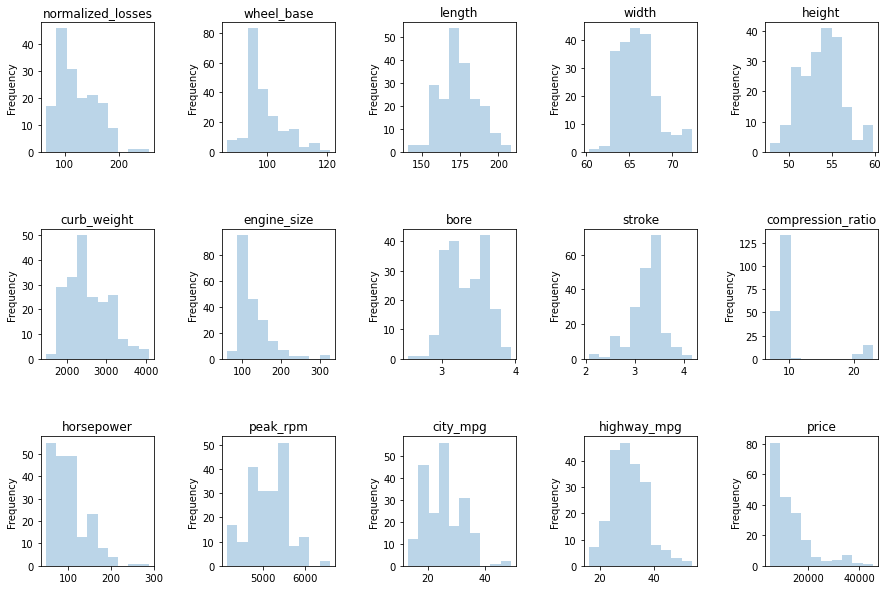

In [120]:
plt.figure(figsize=(15,10))
for i,c in enumerate(numeric_cars.columns,1):
    plt.subplot(3,5,i)
    numeric_cars[c].plot(kind='hist', alpha=0.3, title=f'{c}')
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.show()

In [127]:
numeric_cars[numeric_cars.columns[numeric_cars.isnull().any()].values.tolist()].describe()

,normalized_losses,bore,stroke,horsepower,peak_rpm,price
count,164.000000,201.000000,201.000000,203.000000,203.000000,201.000000
mean,122.000000,3.329751,3.255423,104.256158,5125.369458,13207.129353
std,35.442168,0.273539,0.316717,39.714369,479.334560,7947.066342
min,65.000000,2.540000,2.070000,48.000000,4150.000000,5118.000000
25%,94.000000,3.150000,3.110000,70.000000,4800.000000,7775.000000
50%,115.000000,3.310000,3.290000,95.000000,5200.000000,10295.000000
75%,150.000000,3.590000,3.410000,116.000000,5500.000000,16500.000000
max,256.000000,3.940000,4.170000,288.000000,6600.000000,45400.000000


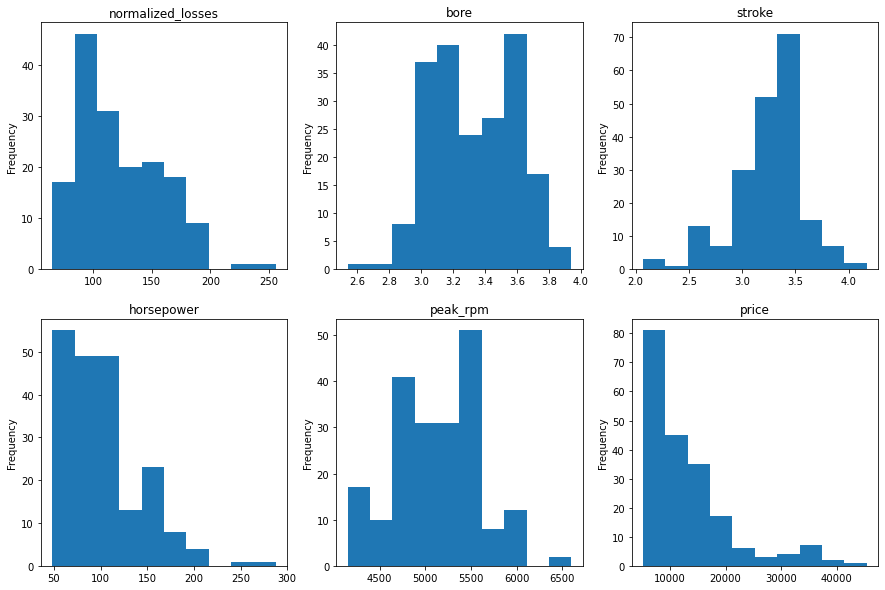

In [138]:
plt.figure(figsize=(15,10))
for i, c in enumerate(numeric_cars.columns[numeric_cars.isnull().any()],1):
    plt.subplot(2,3, i)
    numeric_cars[c].plot(kind='hist', title=f'{c}')
plt.show()


In [139]:
numeric_cars[['horsepower', 'price']].median()

horsepower       95.0
price         10295.0
dtype: float64

In [145]:
numeric_cars[['horsepower', 'price']].isnull().any()

horsepower    True
price         True
dtype: bool

In [151]:
numeric_cars[['horsepower', 'price']].fillna(numeric_cars[['horsepower', 'price']].median()).shape


(205, 2)

## 03. Modelo Univariado

Comencemos con algunos modelos univariados de k-vecinos más cercanos. Comenzar con modelos simples antes de pasar a modelos más complejos nos ayuda a estructurar el flujo de trabajo de código y comprender mejor las funciones.

---

- Cree una función llamada `knn_train_test()` que encapsule el proceso de capacitación y validación simple. Esta función debe tener 3 parámetros: el nombre de la columna de entrenamiento, el nombre de la columna objetivo (target) y dataframe.

    - Esta función debe dividir el conjunto de datos en un conjunto de entrenamiento y otro de prueba.
    - Luego, debe instanciar la clase KNeighborsRegressor, ajustar el modelo en el conjunto de entrenamiento y hacer predicciones en el conjunto de prueba.
    - Finalmente, debe calcular el RMSE y devolver ese valor.

- Use esta función para entrenar y probar modelos univariados usando las diferentes columnas numéricas en el conjunto de datos. ¿Qué columna funcionó mejor usando el valor `k` predeterminado?

- Modifique la función `knn_train_test()` que escribió para aceptar un parámetro para el valor k.
    - Actualice la lógica de la función para usar este parámetro.
    - Para cada columna numérica, cree, entrene y pruebe un modelo univariante utilizando los siguientes valores `k` (`1`, `3`, `5`, `7` y `9`). Visualice los resultados mediante un diagrama de dispersión o un diagrama de líneas.

## 04. Modelo Multivariado

Modifiquemos la función `knn_train_test()` que escribimos anteriormente para trabajar con varias columnas.

---

- Modifique la función `knn_train_test()` para aceptar una lista de nombres de columna (en lugar de solo una cadena). Modifique el resto de la lógica de la función para usar este parámetro:
    - En lugar de usar solo una columna para entrenar y probar, use todas las columnas que se asignarán al parámetro.
    - Utilice el valor `k` predeterminado de scikit-learn por ahora (ajustaremos el valor k en el siguiente paso).
- Utilice las 2 mejores características del paso anterior para entrenar y probar un modelo multivariado de k vecinos más cercanos utilizando el valor `k` predeterminado.
- Utilice las 3 mejores características del paso anterior para entrenar y probar un modelo multivariado de k vecinos más cercanos utilizando el valor `k` predeterminado.
- Utilice las mejores 4 características del paso anterior para entrenar y probar un modelo multivariado de k vecinos más cercanos utilizando el valor `k` predeterminado.
- Use las mejores 5 características del paso anterior para entrenar y probar un modelo multivariado de `k` vecinos más cercanos usando el valor k predeterminado.
- Muestra todos los valores RMSE.


## 05. Ajuste de Hyperparámetros 

Ahora vamos a optimizar el modelo que funcionó mejor en el paso anterior.

----

- Para los 3 modelos principales en el último paso, varíe el valor del hiperparámetro de 1 a 25 y represente gráficamente los valores RMSE resultantes.

- ¿Qué valor de k es óptimo para cada modelo? ¿Qué tan diferentes son los valores de k y qué crees que explica las diferencias?


## 06. ¿Qué sigue?

- Modifique la función `knn_train_test()` para usar la validación cruzada k-fold en lugar de la validación de prueba/entrenamiento.
- Modifique la función `knn_train_test()` para realizar también la limpieza de datos.